<a href="https://colab.research.google.com/github/SeongDahun/RecsysTutorial/blob/main/CTGAN_Credit_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In this tutorial we use the defaul version of the CTGAN:
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.

In [9]:
!pip install ctgan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.3 MB/s eta 0:00:00


In [10]:
!pip install table_evaluator

Now we download a dataset that includes both continuous and discrete values. I chose a random dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [11]:
#!gdown 1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ #Insurance 데이터 불러오기 (아마 다른 사람 드라이브에서 다운로드?)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/creditcard.csv')

In [14]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields.

In [15]:
categorical_features = ['Class']

#Model training

Next, we simply define an instance of CTGAN Synthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

In [16]:
from ctgan import CTGAN

In [17]:
# 전체 데이터 학습
ctgan_all = CTGAN(verbose=True)
ctgan_all.fit(data, categorical_features, epochs = 200)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'mi

Epoch 1, Loss G: -1.2909,Loss D:  0.1198
Epoch 2, Loss G: -2.8579,Loss D:  0.2236
Epoch 3, Loss G: -3.2942,Loss D:  0.0597
Epoch 4, Loss G: -3.5195,Loss D:  0.0399
Epoch 5, Loss G: -3.2311,Loss D:  0.1240
Epoch 6, Loss G: -3.5417,Loss D:  0.2049
Epoch 7, Loss G: -2.7694,Loss D:  0.0283
Epoch 8, Loss G: -2.8659,Loss D:  0.0142
Epoch 9, Loss G: -2.3931,Loss D:  0.0468
Epoch 10, Loss G: -1.8898,Loss D: -0.0659
Epoch 11, Loss G: -1.6602,Loss D:  0.0259
Epoch 12, Loss G: -0.9526,Loss D: -0.1599
Epoch 13, Loss G: -1.0152,Loss D: -0.1052
Epoch 14, Loss G: -0.9056,Loss D: -0.3022
Epoch 15, Loss G: -0.7286,Loss D: -0.4793
Epoch 16, Loss G: -0.5962,Loss D:  0.0026
Epoch 17, Loss G: -1.0559,Loss D:  0.2227
Epoch 18, Loss G: -0.6206,Loss D:  0.0729
Epoch 19, Loss G: -0.5094,Loss D:  0.0152
Epoch 20, Loss G: -0.7553,Loss D: -0.0798
Epoch 21, Loss G: -0.2354,Loss D:  0.1123
Epoch 22, Loss G:  0.0800,Loss D: -0.0841
Epoch 23, Loss G: -0.0904,Loss D: -0.1499
Epoch 24, Loss G:  0.0136,Loss D:  0.0785
E

#Synthetic data generation

In [3]:
# 전체 데이터의 증강 데이터 생성
samples_all = ctgan_all.sample(1424035)
samples_all

NameError: ignored

#Evaluation

In [23]:
from table_evaluator import TableEvaluator

(284807, 31) (1424035, 31)


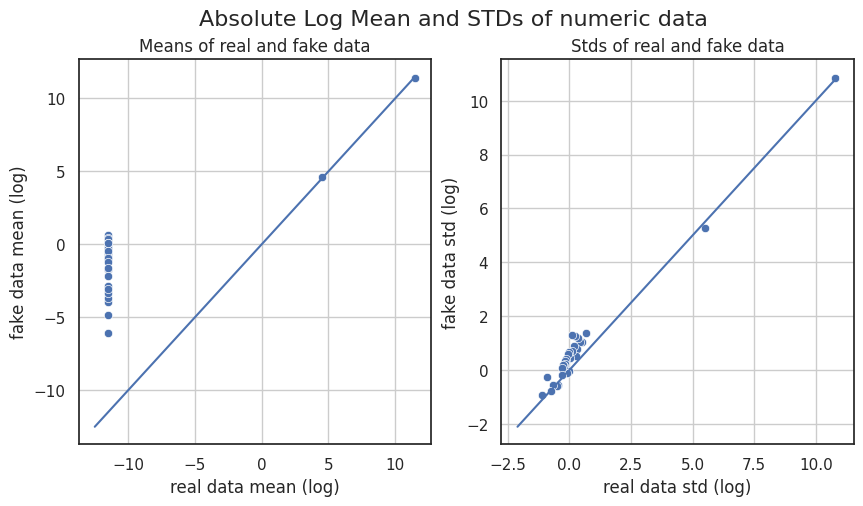

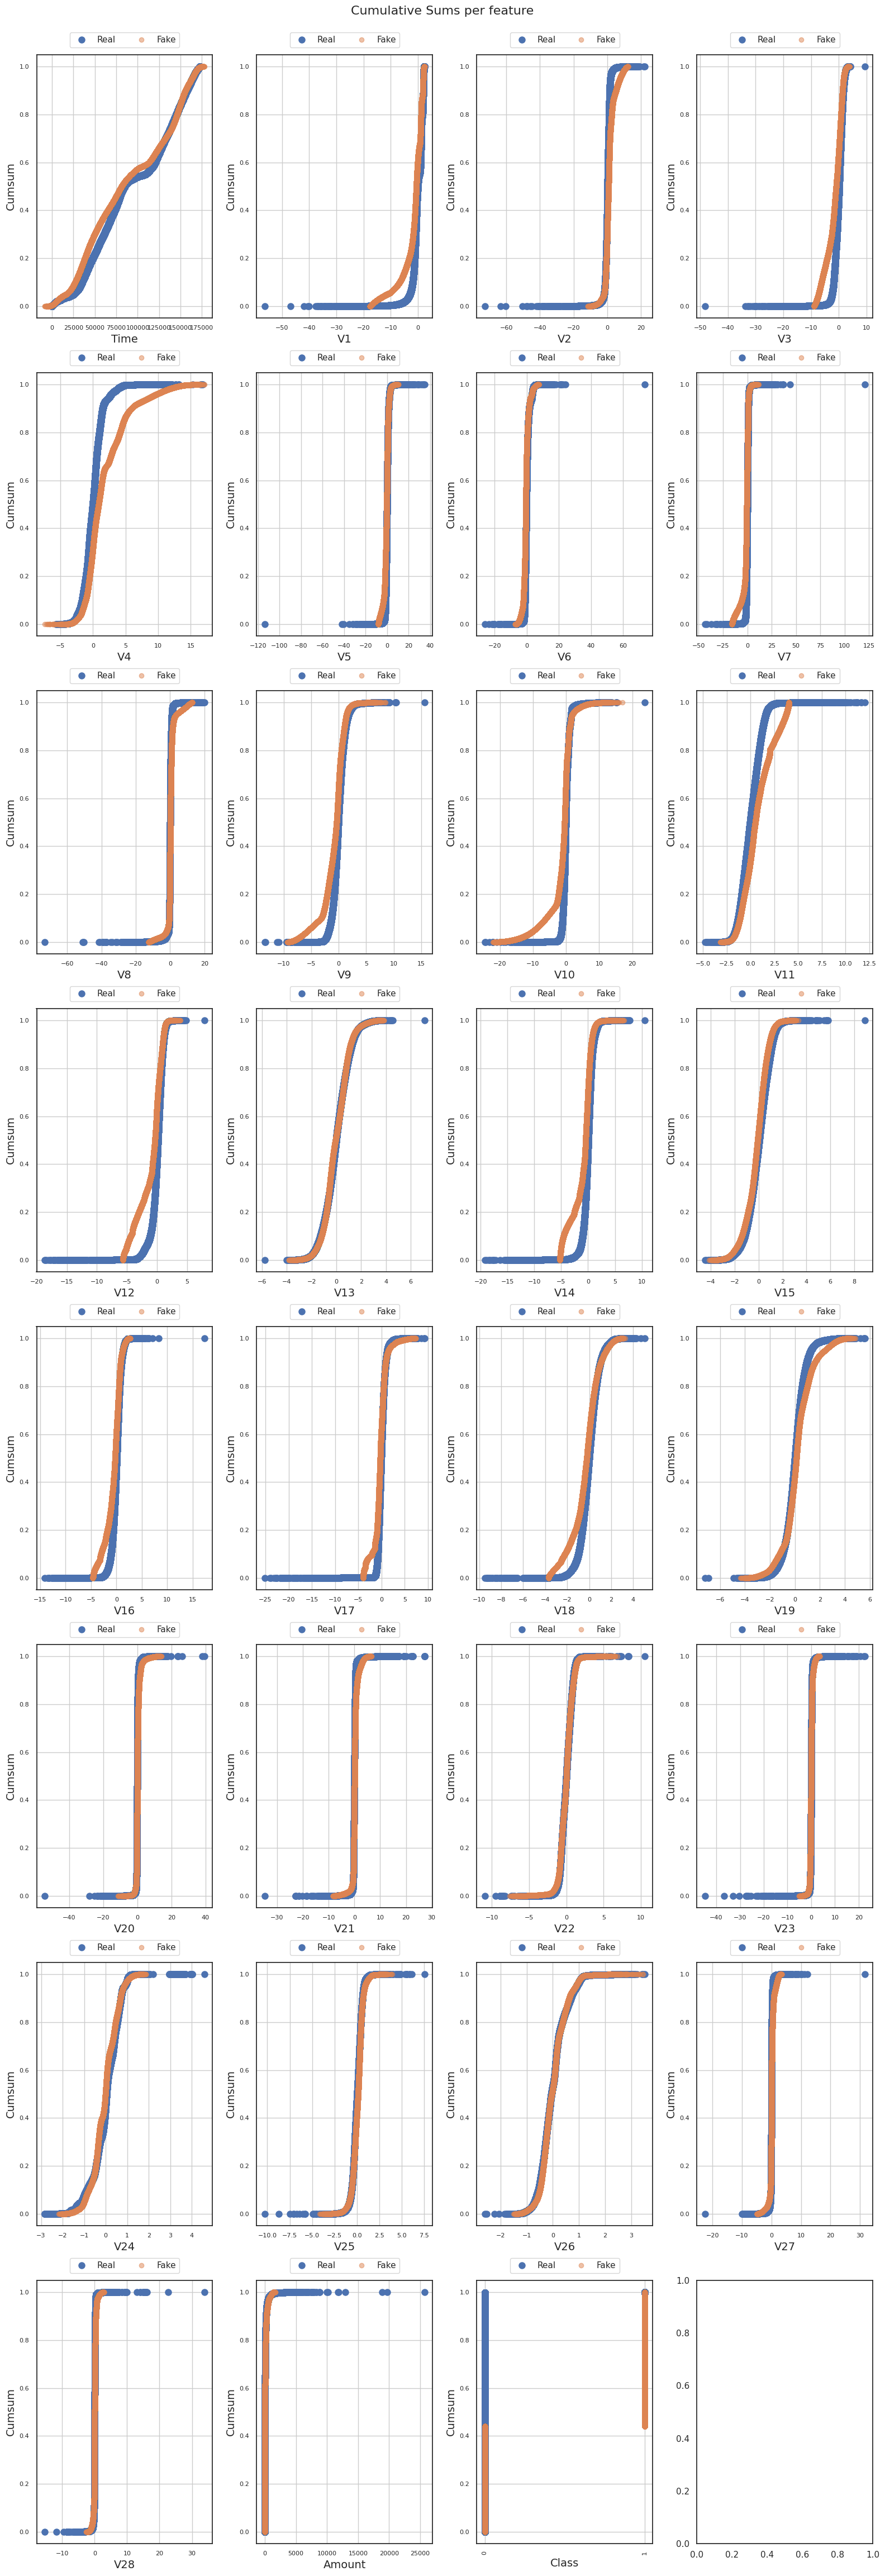

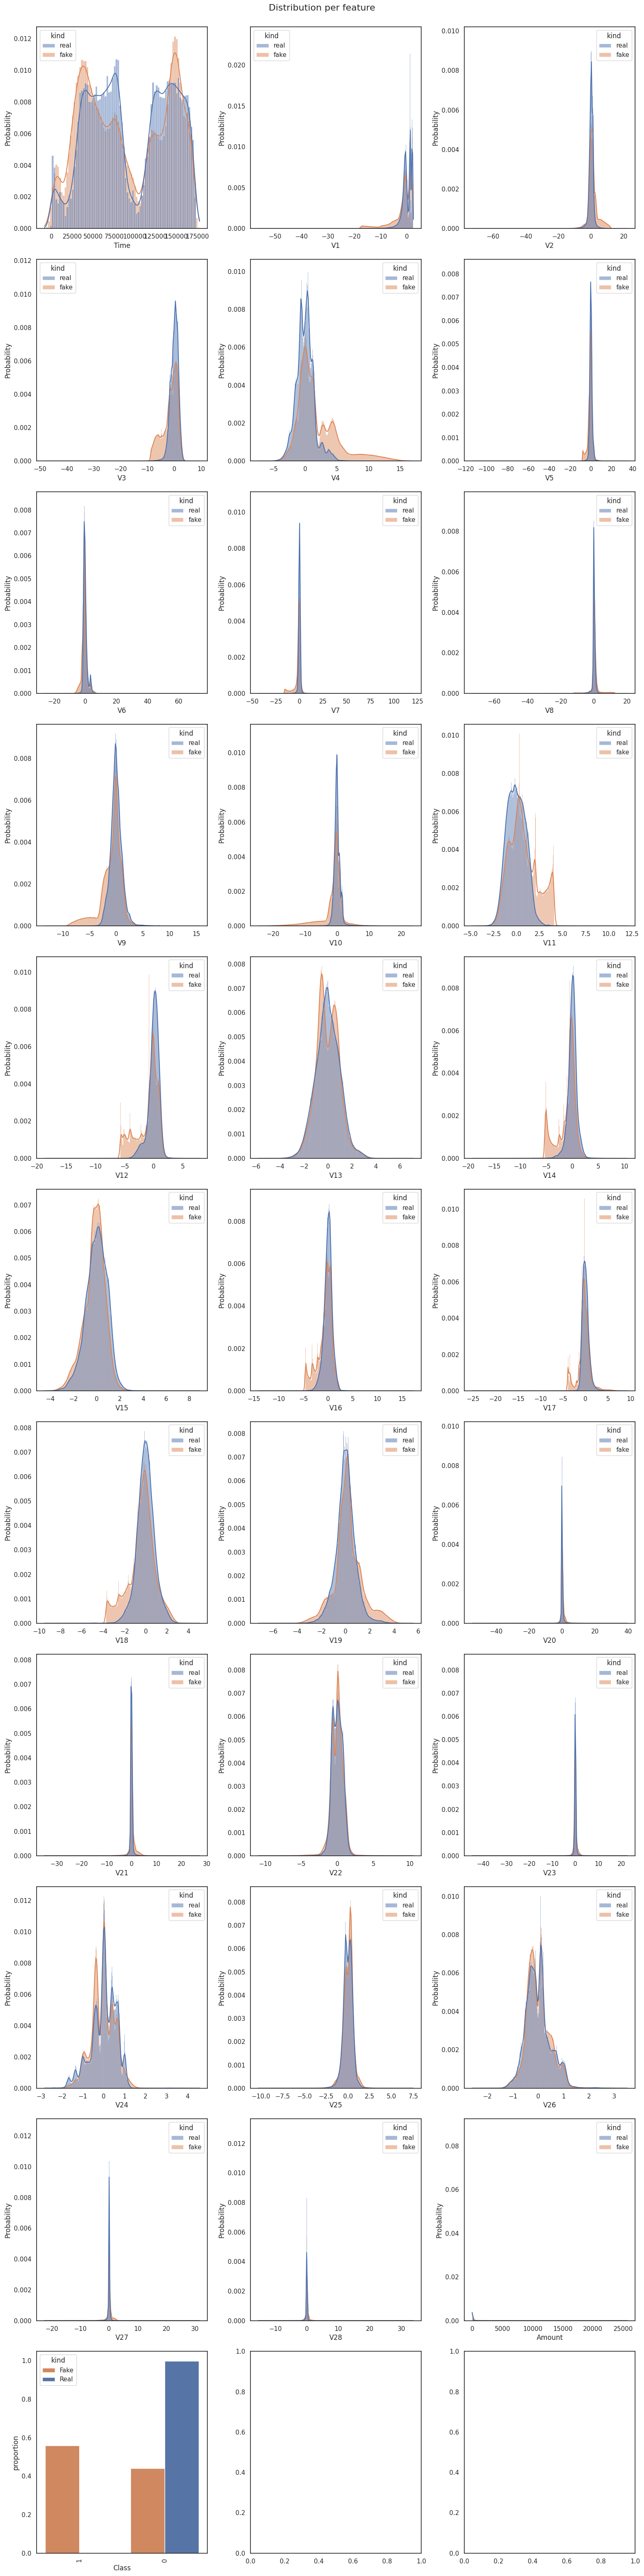

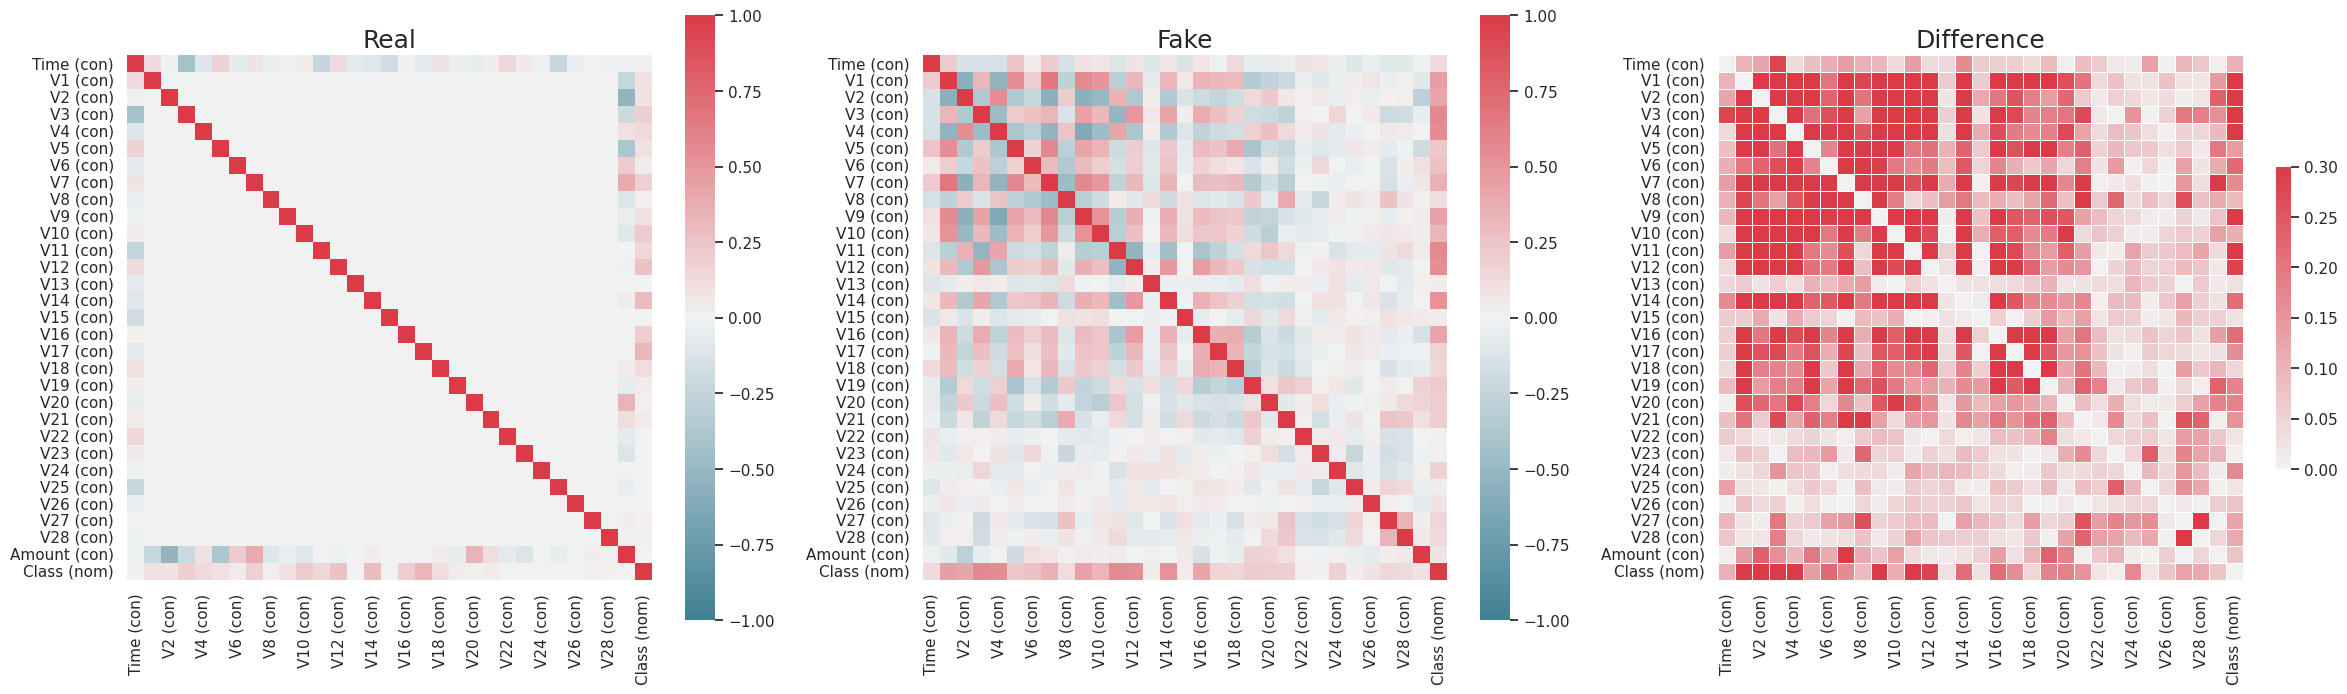

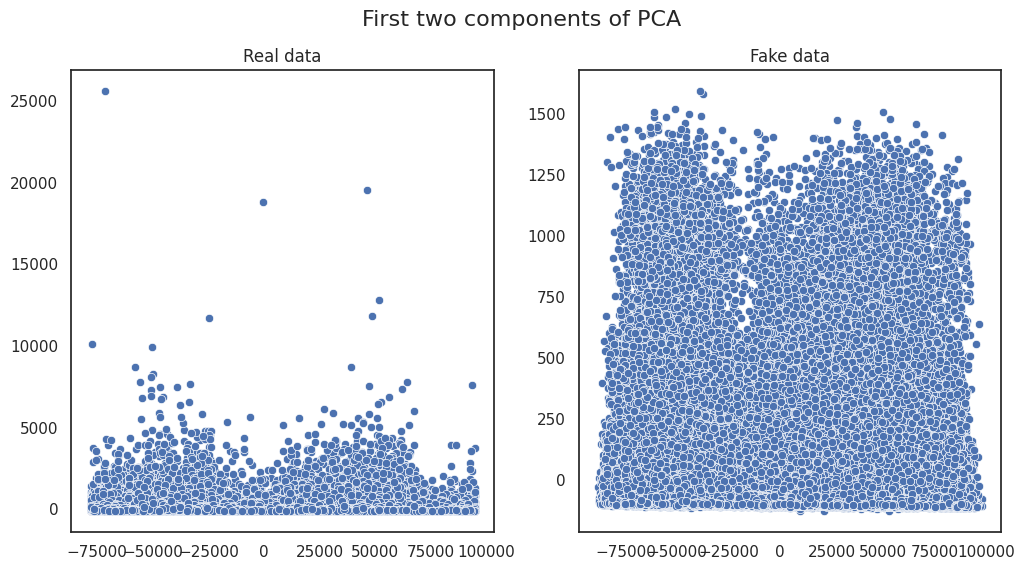

In [44]:
# 전체 데이터 늘릴 때
    # 데이터 원본과 합성 데이터 비교
print(data.shape, samples_all.shape)
table_evaluator_all =  TableEvaluator(data, samples_all, cat_cols= categorical_features)

#table_evaluator_all.visual_evaluation()

In [43]:
table_evaluator_all.evaluate(target_col='Class')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.5655   0.9177              0.3932
DecisionTreeClassifier_real   0.9992   0.8131              0.6850
LogisticRegression_fake       0.5387   0.9295              0.3841
LogisticRegression_real       0.9993   0.8975              0.8139
MLPClassifier_fake            0.4425   0.9394              0.2988
MLPClassifier_real            0.9984   0.8873              0.7952
RandomForestClassifier_fake   0.5296   0.9489              0.3738
RandomForestClassifier_real   0.9995   0.8595              0.7536

Privacy results:
                                            result
Duplicate rows between sets (real/fake)  (1854, 0)
nearest neighbor mean                       3.6778
nearest neighbor std                        2.1463

Miscellaneous results:
                                  Resul